# Case Study: Changes in Fine Particle Air Pollution in the U.S.

In [1]:
# data obtained from
# https://www3.epa.gov/ttnairs1/airsaqsORIG/detaildata/downloadaqsdata.htm

library(readr)
pm0 <- read_delim("RD_501_88101_1999-0.txt",
    delim = "|", comment = "#", col_names = FALSE, na = "")

cnames <- readLines("RD_501_88101_1999-0.txt", 1)
cnames <-strsplit(cnames, "|", fixed = TRUE)
names(pm0) <-make.names(cnames[[1]])

Rows: 117421 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr   (7): X1, X2, X3, X4, X5, X14, X17
dbl   (8): X6, X7, X8, X9, X10, X11, X13, X15
lgl  (12): X16, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28
time  (1): X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
dim(pm0)
head(pm0[,1:13])

# make sure we don't need to notice that the file was overloaded
# with "RC" records that had different fields
table(pm0$X..RD)

[1] 117421     28

X..RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,Date,Start.Time,Sample.Value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
RD,I,01,027,0001,88101,1,7,105,120,19990103,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990106,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990109,00:00:00,NA
RD,I,01,027,0001,88101,1,7,105,120,19990112,00:00:00,8.841
RD,I,01,027,0001,88101,1,7,105,120,19990115,00:00:00,14.920
RD,I,01,027,0001,88101,1,7,105,120,19990118,00:00:00,3.878



    RD 
117421 

In [3]:
# check target variable

x0 <- pm0$Sample.Value
summary(x0)

# 11% of values are missing
sum(is.na(x0)) / nrow(pm0)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.20   11.50   13.74   17.90  157.10   13217 

[1] 0.1125608

In [4]:
# 2012 data set we will compare

pm1 <- read_delim("RD_501_88101_2012-0.txt",
    delim = "|", comment = "#", col_names = FALSE, na = "")

cnames <- readLines("RD_501_88101_2012-0.txt", 1)
cnames <-strsplit(cnames, "|", fixed = TRUE)
names(pm1) <-make.names(cnames[[1]])

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 1304287 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr   (8): X1, X2, X3, X4, X5, X14, X17, X18
dbl   (9): X6, X7, X8, X9, X10, X11, X13, X15, X27
lgl  (10): X16, X19, X20, X21, X22, X23, X24, X25, X26, X28
time  (1): X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# similar checks

dim(pm1)
head(pm1[,1:13])

# make sure we don't need to notice that the file was overloaded
# with "RC" records that had different fields
table(pm1$X..RD)

[1] 1304287      28

X..RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,Date,Start.Time,Sample.Value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
RD,I,01,003,0010,88101,1,7,105,118,20120101,00:00:00,6.7
RD,I,01,003,0010,88101,1,7,105,118,20120104,00:00:00,9.0
RD,I,01,003,0010,88101,1,7,105,118,20120107,00:00:00,6.5
RD,I,01,003,0010,88101,1,7,105,118,20120110,00:00:00,7.0
RD,I,01,003,0010,88101,1,7,105,118,20120113,00:00:00,5.8
RD,I,01,003,0010,88101,1,7,105,118,20120116,00:00:00,8.0



     RD 
1304287 

In [6]:
# check target variable

x1 <- pm1$Sample.Value
summary(x1)

# 11% of values are missing
sum(is.na(x1)) / nrow(pm1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -10.00    4.00    7.63    9.14   12.00  908.97   73133 

[1] 0.05607125

In [7]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [8]:
pm <- rbind(pm0, pm1)
pm <- mutate(pm, year = factor(substr(format(pm$Date),1,4))) %>%
      mutate(month = factor(substr(format(pm$Date),5,6))) %>%
      mutate(yearmonth = factor(substr(format(pm$Date),1,6))) %>%
      rename(PM = Sample.Value)

In [9]:
head(pm[,c(1, 11:13,29:31)],3)
tail(pm[,c(1, 11:13,29:31)],3)

X..RD,Date,Start.Time,PM,year,month,yearmonth
<chr>,<dbl>,<time>,<dbl>,<fct>,<fct>,<fct>
RD,19990103,00:00:00,NA,1999,01,199901
RD,19990106,00:00:00,NA,1999,01,199901
RD,19990109,00:00:00,NA,1999,01,199901


X..RD,Date,Start.Time,PM,year,month,yearmonth
<chr>,<dbl>,<time>,<dbl>,<fct>,<fct>,<fct>
RD,20120623,00:00:00,9.0,2012,06,201206
RD,20120626,00:00:00,7.9,2012,06,201206
RD,20120629,00:00:00,7.4,2012,06,201206


# Entire U.S. Analysis

Warning message in FUN(X[[i]], ...):
"NaNs produced"
Warning message in FUN(X[[i]], ...):
"NaNs produced"
Warning message:
"Removed 143164 rows containing non-finite values (`stat_boxplot()`)."


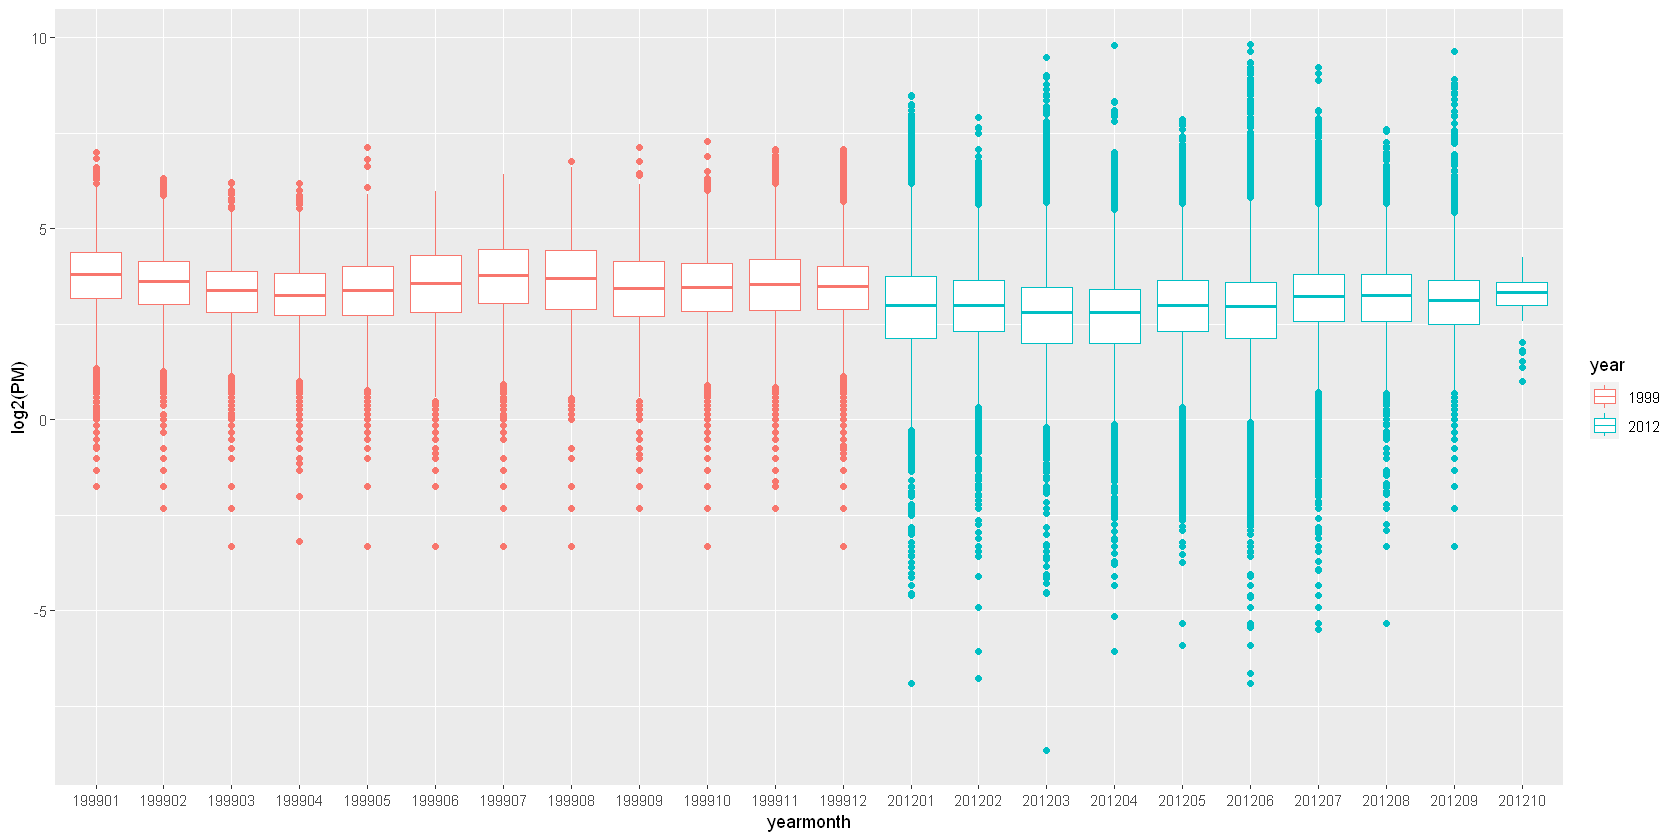

In [10]:
library(ggplot2)

# just look at a random subset becuase it is faster
set.seed(2015)
idx <- sample(nrow(pm), 1000)

options(repr.plot.width=14)
ggplot() + geom_boxplot(data = pm, aes(yearmonth, log2(PM), color = year))